<a href="https://colab.research.google.com/github/mussolin123/Deflagra-es-PRF/blob/main/Investiga%C3%A7%C3%A3oPF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PALAS - Sistema de informações de investigação**
Contém número de operações deflagradas, bens e/ou valores apreendidos, armas e munições apreendidas, quantidade de presos, quantidade de Mandados de Busca e Apreensão/Prisão. Fonte: https://servicos.dpf.gov.br/dadosabertos/PALAS/

**Importação da Lib Pandas e do Google Drive**:

In [ ]:
from google.colab import drive #importando google drive
drive.mount('/drive') #"ponte" entre o ambiente Python e o Google Drive

Mounted at /drive


In [ ]:
import pandas as pd #importando a biblioteca pandas

In [ ]:
base_dir = '/drive/MyDrive/ColabNotebooks/' #define o caminho base para os arquivos que você desejamos acessar

**Importação e Concatenação das bases de dados da PRF**

In [ ]:
dataframes = [] #esse comando cria uma lista vazia chamada "dataframes".
bases = [] #Importando e Concatenando Múltiplos Arquivos CSV, o "{1}" faz com que mude o n° de cada arquivo (1 a 12)

for i in ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"] :
  bases.append(pd.read_csv(f'/content/drive/MyDrive/ColabNotebooks/PALAS_OPERACOES_2023_{i}.csv', encoding = "latin-1", sep = ";"))
  df = pd.concat(bases) #concatena múltiplos DataFrames (tabelas) em um único DataFrame, essencialmente "empilhando-os" um em cima do outro.

**Listagem da Base de Dados concatenada**

In [ ]:
  df # df: É a variável que irá armazenar o novo DataFrame, ao executar, visualizamos a base atualizada

,Checksum Id Operacao,Data do Inicio,Data da Deflagracao,Tipo de Operacao,Area,Sigla Unidade Federativa,Sigla Unidade Institucional,Atuacao em Territorio Indigena,Atuacao em Territorio de Fronteira,Qtd Prisao em Flagrante,...,Proib Acesso ou Freq,Comparecimento Juizo,Qtd Fianca,Qtd Internacao Prov,Proib Contato,Mand Jud Caut Assec,Recol Domic Noturno,Susp Ex Func Pub A E,Monit Eletronica,Id Operacao
0,bfc7c84548103732a8d67831f215ed0f,21/05/2021,31/01/2023,Operacao Especial,Crimes Fazendários ...,GO,DPF/JTI/GO ...,Nao,...,0,...,0,0,0,0,0,0,0,0,0,NaN
1,f6ac50db92ee769cf0c39183f5fbf706,22/08/2022,31/01/2023,Operacao Especial,Crimes Fazendários ...,MS,DPF/PPA/MS ...,Nao,Paraguai ...,0,...,0,0,0,0,0,0,0,0,0,NaN
2,c31373f90e083cc48bad81f51dab0363,26/09/2022,31/01/2023,Operacao Especial,Crimes Fazendários ...,RN,SR/PF/RN ...,Nao,...,0,...,0,0,0,0,0,0,0,0,0,NaN
3,569bcb7625d0679e8475d8a5e9cafbf1,25/10/2022,31/01/2023,Operacao Especial,Tráfico de Drogas ...,AP,SR/PF/AP ...,Nao,...,0,...,0,0,0,0,0,0,0,0,0,NaN
4,1ac6259c3a13e18313ccb3b0bbf21733,30/01/2023,31/01/2023,Operacao Simples,Tráfico de Drogas ...,PR,DPF/FIG/PR ...,Nao,Paraguai ...,0,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,818d725171c868e5bc58c82794c408f2,02/12/2023,02/12/2023,Operacao de Apoio,Tráfico de Drogas ...,SE,SR/PF/SE ...,Nao,...,0,...,0,0,0,0,0,0,0,0,0,NaN
682,8ad439a301c8178f63f271abc3687940,02/12/2023,02/12/2023,Operacao Simples,Tráfico de Drogas ...,RJ,DPF/AIN/RJ ...,Nao,...,1,...,0,0,0,0,0,0,0,0,0,NaN
683,4aaac55b37f3522763699c33a10d7f9a,02/12/2023,02/12/2023,Operacao Simples,Tráfico de Drogas ...,RJ,DPF/AIN/RJ ...,Nao,...,1,...,0,0,0,0,0,0,0,0,0,NaN
684,3d8858b9b87e533499f4f3cf562aba81,02/12/2023,02/12/2023,Operacao Simples,Crimes Fazendários ...,SP,DPF/CAS/SP ...,Nao,...,0,...,0,0,0,0,0,0,0,0,0,NaN


**Aqui contabilizamos quantas "Data de Deflagracao" foram registradas em 2023**

In [ ]:
print(df['Data da Deflagracao'].count())

9337


**Importação da lib seaborn para geração de gráfico;**

**Importação de módulo Pyplot da lib Matplotlib;**

**Importação Numpy para computação científica**

In [ ]:
import seaborn as sns # importa módulos ou bibliotecas.
import matplotlib.pyplot as plt # importa o módulo pyplot da biblioteca Matplotlib, é a biblioteca padrão para criação de gráficos em Python.
import numpy as np #O NumPy é uma biblioteca fundamental para computação científica em Python
#A parte as np cria um apelido para o módulo NumPy

**Aqui buscamos a "Area" que mais aparece na base de dados, no ano de 2023.**

**E calculamos com o "count", a quantidade de vezes que foi listada.**

In [ ]:
from prettytable import PrettyTable

contagem_areas = df['Area'].value_counts() #Calcula a frequência de cada valor na coluna "area" e armazena o resultado em "contagem_areas"
contagem_areas # apresenta o resultado na tela

# Criar uma tabela PrettyTable
tabela_areas = PrettyTable()
tabela_areas.field_names = ["Área", "Frequência"]

# Adicionar as linhas à tabela
for area, contagem in contagem_areas.items():
    tabela_areas.add_row([area, contagem])
    tabela_areas.max_width = 50  # Ajuste o valor 100 de acordo com sua necessidade

# Imprimir a tabela
print(tabela_areas)

+----------------------------------------------------+------------+
|                        Área                        | Frequência |
+----------------------------------------------------+------------+
|                 Tráfico de Drogas                  |    2947    |
|                 Crimes Fazendários                 |    2891    |
|       Crimes de Ódio e Pornografia Infantil        |    885     |
|  Crimes Ambientais e Contra o Patrimônio Cultural  |    622     |
|                Crimes de Corrupção                 |    583     |
|             Crimes Contra o Patrimônio             |    399     |
|                  Tráfico de Armas                  |    261     |
|           Crimes Contra Direitos Humanos           |    258     |
|                 Crimes Financeiros                 |    204     |
|               Crimes Previdenciários               |    133     |
|                 Fraudes Bancárias                  |     60     |
|                 Crimes Eleitorais             

**Aqui busco qual "Area" e "Sigla Unidade Federativa" são mais listadas**

In [ ]:
# Encontra a área mais frequente
most_frequent_area = df['Area'].value_counts().idxmax()

# Filtra o dataframe pela área mais frequente
df_filtered = df[df['Area'] == most_frequent_area]

# Encontra a "Sigla Unidade Federativa" mais frequente dentro da área filtrada
most_frequent_uf = df_filtered['Sigla Unidade Federativa'].value_counts().idxmax()

# Exibe o resultado
print(f"A área mais frequente é: {most_frequent_area}")
print(f"A Sigla Unidade Federativa mais frequente nessa área é: {most_frequent_uf}")

A área mais frequente é: Tráfico de Drogas                                                                                                               
A Sigla Unidade Federativa mais frequente nessa área é: SP


**Busco a quantidade de vezes que a ocorrência por "Area" foi apresentada;**

**E busco a quantidade de "area" foi listadas por "Sigla Unidade Federativa".**

In [ ]:
# Encontra as 3 áreas mais frequentes
top_3_areas = df['Area'].value_counts().nlargest(3)

# Cria uma lista para armazenar os resultados
resultados = []

# Itera sobre as 3 áreas mais frequentes
for area, contagem_area in top_3_areas.items():
    # Filtra o dataframe pela área atual
    df_filtered = df[df['Area'] == area]

    # Encontra as 3 siglas mais frequentes na área atual
    top_3_siglas = df_filtered['Sigla Unidade Federativa'].value_counts().nlargest(3)

    # Adiciona os resultados à lista
    for sigla, contagem_sigla in top_3_siglas.items():
        resultados.append([area, contagem_area, sigla, contagem_sigla])

# Cria um DataFrame com os resultados
tabela = pd.DataFrame(resultados, columns=['Área', 'Contagem Área', 'Sigla', 'Contagem Sigla'])

# Exibe a tabela
display(tabela)



,Área,Contagem Área,Sigla,Contagem Sigla
0,Tráfico de Drogas ...,2947,SP,684
1,Tráfico de Drogas ...,2947,MS,561
2,Tráfico de Drogas ...,2947,PR,179
3,Crimes Fazendários ...,2891,PR,528
4,Crimes Fazendários ...,2891,MS,404
5,Crimes Fazendários ...,2891,SP,378
6,Crimes de Ódio e Pornografia Infantil ...,885,SP,148
7,Crimes de Ódio e Pornografia Infantil ...,885,PR,74
8,Crimes de Ódio e Pornografia Infantil ...,885,RS,69


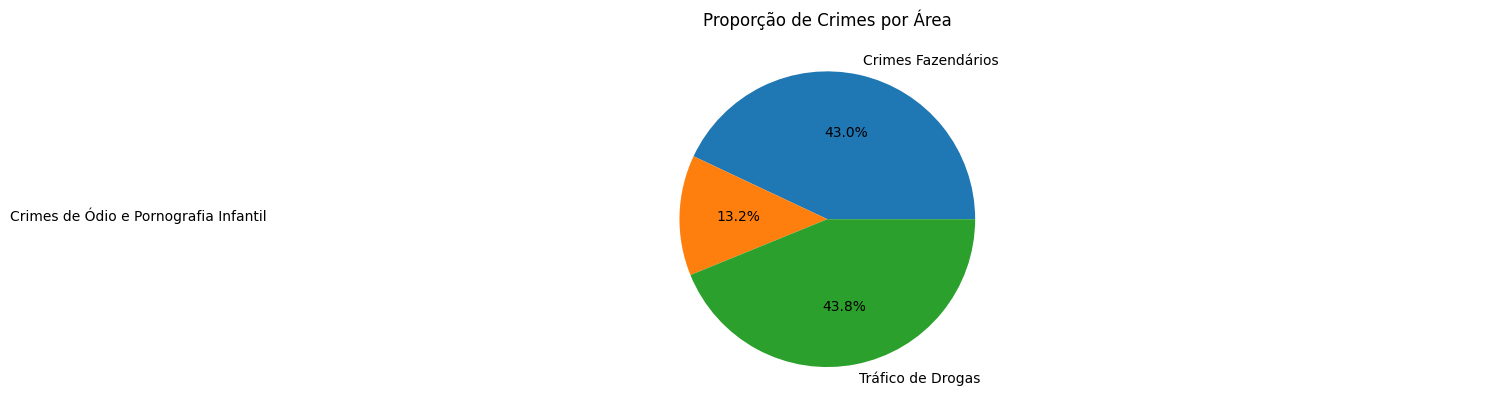

In [ ]:
# prompt: Usando o DataFrame tabela: gere um grafico de pizza

import matplotlib.pyplot as plt

# Calculate the sum of 'Contagem Área' for each area
area_counts = tabela.groupby('Área')['Contagem Área'].sum()

# Create the pie chart
plt.pie(area_counts, labels=area_counts.index, autopct='%1.1f%%')
plt.title('Proporção de Crimes por Área')
plt.show()


**Apresento as 3 areas com mais ocorrências por UF (obtido em pesquisas anteriores) e gero um gráfico de pizza com a porcentagem de crimes por tipo**

                                   Crime  Registros  UF  Número
0                      Tráfico de Drogas       2947  SP     684
1                      Tráfico de Drogas       2947  MS     561
2                      Tráfico de Drogas       2947  PR     179
3                     Crimes Fazendários       2891  PR     528
4                     Crimes Fazendários       2891  MS     404
5                     Crimes Fazendários       2891  SP     378
6  Crimes de Ódio e Pornografia Infantil        885  SP     148
7  Crimes de Ódio e Pornografia Infantil        885  PR      74
8  Crimes de Ódio e Pornografia Infantil        885  RS      69


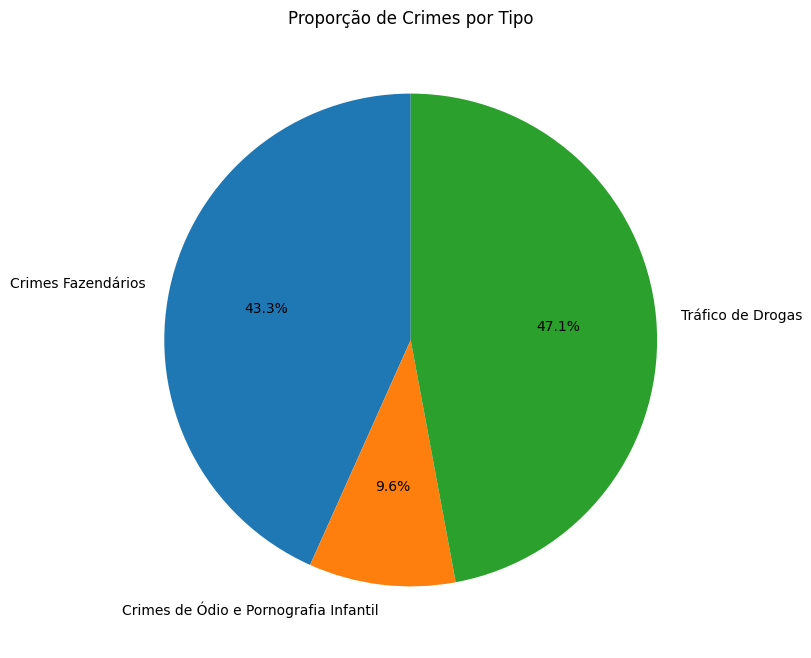

In [ ]:
data = [
    ['Tráfico de Drogas', 2947, 'SP', 684],
    ['Tráfico de Drogas', 2947, 'MS', 561],
    ['Tráfico de Drogas', 2947, 'PR', 179],
    ['Crimes Fazendários', 2891, 'PR', 528],
    ['Crimes Fazendários', 2891, 'MS', 404],
    ['Crimes Fazendários', 2891, 'SP', 378],
    ['Crimes de Ódio e Pornografia Infantil', 885, 'SP', 148],
    ['Crimes de Ódio e Pornografia Infantil', 885, 'PR', 74],
    ['Crimes de Ódio e Pornografia Infantil', 885, 'RS', 69]
]

# Criando o DataFrame
df = pd.DataFrame(data, columns=['Crime', 'Registros', 'UF', 'Número'])

# Verificando o DataFrame (opcional)
print(df)

# Agrupando os dados por tipo de crime e UF, e calculando a soma
df_grouped = df.groupby(['Crime', 'UF']).sum().reset_index()

# Agrupando os dados apenas por tipo de crime e calculando a soma
df_grouped_crime = df_grouped.groupby('Crime')['Número'].sum()

# Criando o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(df_grouped_crime, labels=df_grouped_crime.index, autopct='%1.1f%%', startangle=90)
plt.title('Proporção de Crimes por Tipo')
plt.show()

**Apresento as 3 areas com mais ocorrências por UF (obtido em pesquisas anteriores) e gero um gráfico de colunas com o crime, UF e quantidade de evidências**

                Crime  Registros  UF  Número
0   Tráfico de Drogas       2947  SP     684
1   Tráfico de Drogas       2947  MS     561
2   Tráfico de Drogas       2947  PR     179
3  Crimes Fazendários       2891  PR     528
4  Crimes Fazendários       2891  MS     404
5  Crimes Fazendários       2891  SP     378
6  Ódio e P. Infantil        885  SP     148
7  Ódio e P. Infantil        885  PR      74
8  Ódio e P. Infantil        885  RS      69


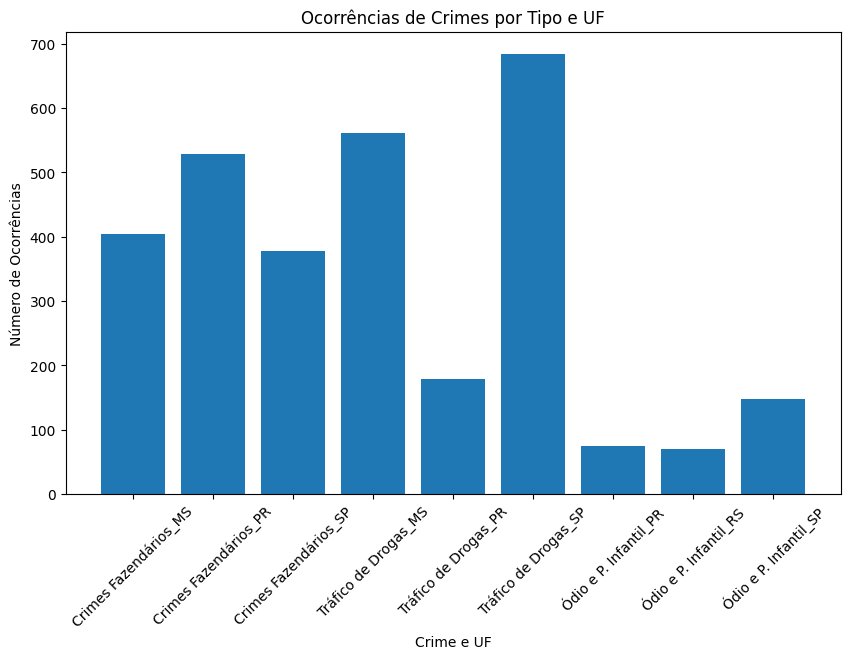

In [ ]:
data = [
['Tráfico de Drogas', 2947, 'SP', 684],
['Tráfico de Drogas', 2947, 'MS', 561],
['Tráfico de Drogas', 2947, 'PR', 179],
['Crimes Fazendários', 2891, 'PR', 528],
['Crimes Fazendários', 2891, 'MS', 404],
['Crimes Fazendários', 2891, 'SP', 378],
['Ódio e P. Infantil', 885, 'SP', 148],
['Ódio e P. Infantil', 885, 'PR', 74],
['Ódio e P. Infantil', 885, 'RS', 69]
]

# Criando o DataFrame
df = pd.DataFrame(data, columns=['Crime', 'Registros', 'UF', 'Número'])

# Verificando o DataFrame (opcional)
print(df)

# Agrupando os dados por tipo de crime e UF, e calculando a soma
df_grouped = df.groupby(['Crime', 'UF']).sum().reset_index()

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_grouped['Crime'] + '_' + df_grouped['UF'], df_grouped['Número'])
plt.xlabel('Crime e UF')
plt.ylabel('Número de Ocorrências')
plt.title('Ocorrências de Crimes por Tipo e UF')
plt.xticks(rotation=45)
plt.show()

**Com base nos resultados obtidos, gero um gráfico de quantidade de ocorrências por UF e area**

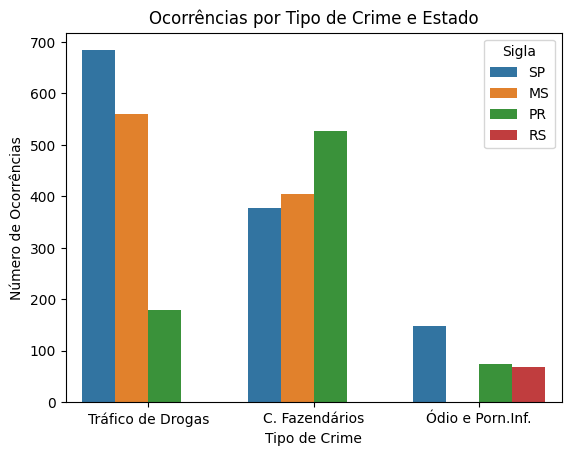

In [ ]:
# Criando um DataFrame a partir dos dados (ajuste os valores conforme necessário)
data = {'Área': ['Tráfico de Drogas', 'Tráfico de Drogas', 'Tráfico de Drogas', 'C. Fazendários', 'C. Fazendários', 'C. Fazendários', 'Ódio e Porn.Inf.', 'Ódio e Porn.Inf.', 'Ódio e Porn.Inf.'],
        'Contagem': [684, 561, 179, 528, 404, 378, 148, 74, 69],
        'Sigla': ['SP', 'MS', 'PR', 'PR', 'MS', 'SP', 'SP', 'PR', 'RS']}
df = pd.DataFrame(data)

# Criando o gráfico de barras agrupadas
sns.barplot(x='Área', y='Contagem', hue='Sigla', data=df)
plt.title('Ocorrências por Tipo de Crime e Estado')
plt.xlabel('Tipo de Crime')
plt.ylabel('Número de Ocorrências')
plt.show()

**Busco na base de dados, qual área e Estado aparecem mais vezes na base. E qual o mês que foi registrado mais ocorrências em geral.**

Remontamos a base de dados concatenada

In [ ]:
dataframes = [] #esse comando cria uma lista vazia chamada "dataframes".
bases = [] #Importando e Concatenando Múltiplos Arquivos CSV, o "{1}" faz com que mude o n° de cada arquivo (1 a 12)

for i in ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"] :
  bases.append(pd.read_csv(f'/content/drive/MyDrive/ColabNotebooks/PALAS_OPERACOES_2023_{i}.csv', encoding = "latin-1", sep = ";"))
  df = pd.concat(bases) #concatena múltiplos DataFrames (tabelas) em um único DataFrame, essencialmente "empilhando-os" um em cima do outro.

In [ ]:
# Verifica se a coluna 'Area' existe antes de usar
if 'Area' in df.columns:
    most_frequent_area = df['Area'].mode()[0]
else:
    print("A coluna 'Area' não existe no DataFrame.")

# Find the most frequent area
most_frequent_area = df['Area'].mode()[0]

# Find the most frequent "Sigla Unidade Federativa"
most_frequent_uf = df['Sigla Unidade Federativa'].mode()[0]

# Extract the month from "Data da Deflagracao" and convert to numeric month
df['Month'] = pd.to_datetime(df['Data da Deflagracao'], format='%d/%m/%Y', errors='coerce').dt.month

# Find the most frequent month
most_frequent_month = df['Month'].mode()[0]

# Print the results
print(f"A área mais frequente é: {most_frequent_area}")
print(f"A Sigla Unidade Federativa mais frequente é: {most_frequent_uf}")
print(f"O mês com mais ocorrências é: {most_frequent_month}")

A área mais frequente é: Tráfico de Drogas                                                                                                               
A Sigla Unidade Federativa mais frequente é: SP
O mês com mais ocorrências é: 10


Busco mês a mês, a Deflagração mais frequente por Estado em 2023. Uso a lib PrettyTable para gerar uma tabela de fácil entendimento.



In [ ]:
from prettytable import PrettyTable

# Encontra a área e a unidade federativa mais frequentes
area_mais_frequente = df['Area'].value_counts().idxmax()
uf_mais_frequente = df['Sigla Unidade Federativa'].value_counts().idxmax()

print(f"A área mais frequente é: {area_mais_frequente}")
print(f"A unidade federativa mais frequente é: {uf_mais_frequente}")

# Extrai o mês da coluna "Data da Deflagracao"
df['Mes'] = df['Data da Deflagracao'].str.split('/').str[1]

# Cria um dicionário para armazenar as contagens mensais
contagens_mensais = {}

# Itera pelos meses
for mes in range(1, 13):
    mes_str = str(mes).zfill(2)
    df_mes = df[df['Mes'] == mes_str]

    # Encontra a área, UF e mês mais frequentes para o mês atual
    area_mes = df_mes['Area'].value_counts().idxmax()
    uf_mes = df_mes['Sigla Unidade Federativa'].value_counts().idxmax()

    contagens_mensais[mes_str] = {'area': area_mes, 'uf': uf_mes}

# Imprime os resultados mensais
for mes, contagem in contagens_mensais.items():
    print(f"Mês: {mes}")
    print(f"  Área mais frequente: {contagem['area']}")
    print(f"  UF mais frequente: {contagem['uf']}")

# Criar uma tabela PrettyTable
tabela = PrettyTable()
tabela.field_names = ["Mês", "Área Mais Frequente", "UF Mais Frequente"]

# Definir a largura máxima para a coluna "Área Mais Frequente"
tabela.max_width = 80  # Ajuste este valor conforme necessário

# Adicionar as linhas à tabela
for mes, contagem in contagens_mensais.items():
    # Abreviar o nome da área (opcional)
    area_abreviada = contagem['area'][:15]  # Abrevia para os primeiros 15 caracteres
    tabela.add_row([mes, area_abreviada, contagem['uf']])

# Imprimir a tabela
print(tabela)

A área mais frequente é: Tráfico de Drogas                                                                                                               
A unidade federativa mais frequente é: SP
Mês: 01
  Área mais frequente: Crimes Fazendários                                                                                                              
  UF mais frequente: PR
Mês: 02
  Área mais frequente: Crimes Fazendários                                                                                                              
  UF mais frequente: SP
Mês: 03
  Área mais frequente: Tráfico de Drogas                                                                                                               
  UF mais frequente: SP
Mês: 04
  Área mais frequente: Tráfico de Drogas                                                                                                               
  UF mais frequente: SP
Mês: 05
  Área mais frequente: Tráfico de Drogas                    

**Filtramos a quantidade de deflagraçoes mensalmente em SP, mês a mês, no ano de 2023.**

In [ ]:
from prettytable import PrettyTable

# Certifique-se de que 'df' contém a coluna 'Data da Deflagracao' e 'Sigla Unidade Federativa'
df_sp = df[df['Sigla Unidade Federativa'] == 'SP'].copy()  # Crie uma cópia explícita

# Extraia o mês da coluna 'Data da Deflagracao'
df_sp.loc[:, 'Mes'] = pd.to_datetime(df_sp['Data da Deflagracao'], format='%d/%m/%Y', errors='coerce').dt.month

# Conte as deflagrações por mês
contagem_mensal = df_sp['Mes'].value_counts().sort_index()

# Imprima os resultados
print("Deflagrações mensais em SP no ano de 2023:")
for mes, contagem in contagem_mensal.items():
    print(f"Mês {mes}: {contagem} deflagrações")

    # Cria uma tabela PrettyTable
tabela_deflagracoes = PrettyTable()
tabela_deflagracoes.field_names = ["Mês", "Quantidade de Deflagrações"]

# Adiciona as linhas à tabela
for mes, contagem in contagem_mensal.items():
    tabela_deflagracoes.add_row([mes, contagem])

# Imprime a tabela
print(tabela_deflagracoes)

Deflagrações mensais em SP no ano de 2023:
Mês 1: 100 deflagrações
Mês 2: 120 deflagrações
Mês 3: 85 deflagrações
Mês 4: 137 deflagrações
Mês 5: 222 deflagrações
Mês 6: 107 deflagrações
Mês 7: 115 deflagrações
Mês 8: 44 deflagrações
Mês 9: 150 deflagrações
Mês 10: 175 deflagrações
Mês 11: 151 deflagrações
Mês 12: 116 deflagrações
+-----+----------------------------+
| Mês | Quantidade de Deflagrações |
+-----+----------------------------+
|  1  |            100             |
|  2  |            120             |
|  3  |             85             |
|  4  |            137             |
|  5  |            222             |
|  6  |            107             |
|  7  |            115             |
|  8  |             44             |
|  9  |            150             |
|  10 |            175             |
|  11 |            151             |
|  12 |            116             |
+-----+----------------------------+


**Calculando a média de deflagrações mensais em SP, com base nos dados emitidos na consulta anterior**

A média de deflagrações por mês é: 126.83


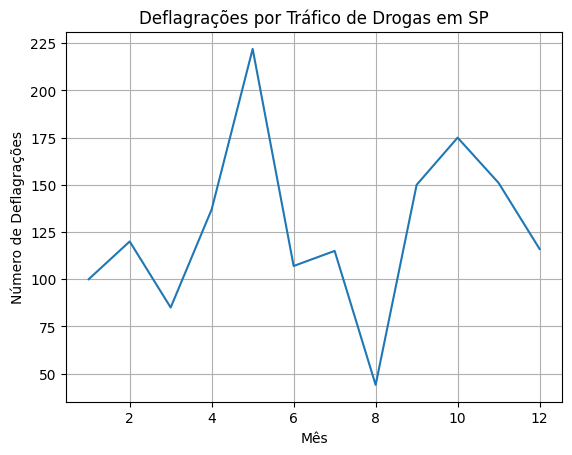

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Criando um DataFrame com os dados
dados = {'Mes': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
         'Deflagracoes': [100, 120, 85, 137, 222, 107, 115, 44, 150, 175, 151, 116]}
df = pd.DataFrame(dados)

# Calculando a média
media = df['Deflagracoes'].mean()
print(f"A média de deflagrações por mês é: {media:.2f}")

# Criando o gráfico de linhas
plt.plot(df['Mes'], df['Deflagracoes'])
plt.xlabel('Mês')
plt.ylabel('Número de Deflagrações')
plt.title('Deflagrações por Tráfico de Drogas em SP')
plt.grid(True)
plt.show()

**(Importação da lib Prettylab para para criar tabelas bonitas no terminal)**

Aqui, filtramos a quantidade de operações feitas em 2023 pela PRF, por ÁREA

Remontamos a base concatenada

In [ ]:
dataframes = [] #esse comando cria uma lista vazia chamada "dataframes".
bases = [] #Importando e Concatenando Múltiplos Arquivos CSV, o "{1}" faz com que mude o n° de cada arquivo (1 a 12)

for i in ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"] :
  bases.append(pd.read_csv(f'/content/drive/MyDrive/ColabNotebooks/PALAS_OPERACOES_2023_{i}.csv', encoding = "latin-1", sep = ";"))
  df = pd.concat(bases) #concatena múltiplos DataFrames (tabelas) em um único DataFrame, essencialmente "empilhando-os" um em cima do outro.

In [ ]:
from prettytable import PrettyTable

# Calcula a quantidade de operações por área
contagem_por_area = df.groupby('Area')['Tipo de Operacao'].count()

# Cria uma tabela PrettyTable
tabela = PrettyTable()
tabela.field_names = ["Área", "Quantidade de Operações"]

# Adiciona as linhas à tabela
for area, contagem in contagem_por_area.items():
    tabela.add_row([area, contagem])
    tabela.max_width = 50  # Ajuste o valor 100 de acordo com sua necessidade


# Imprime a tabela
print(tabela)

+----------------------------------------------------+-------------------------+
|                        Área                        | Quantidade de Operações |
+----------------------------------------------------+-------------------------+
|  Crimes Ambientais e Contra o Patrimônio Cultural  |           622           |
|           Crimes Contra Direitos Humanos           |           258           |
|             Crimes Contra o Patrimônio             |           399           |
|                 Crimes Eleitorais                  |            48           |
|                 Crimes Fazendários                 |           2891          |
|                 Crimes Financeiros                 |           204           |
|               Crimes Previdenciários               |           133           |
|             Crimes da Alta Tecnologia              |            46           |
|                Crimes de Corrupção                 |           583           |
|       Crimes de Ódio e Por

In [ ]:
area_mais_operacoes = df.groupby('Area')['Tipo de Operacao'].count().idxmax()
contagem_operacoes = df.groupby('Area')['Tipo de Operacao'].count().max()

print(f"A área com mais operações é: {area_mais_operacoes}, com um total de {contagem_operacoes} operações.")

A área com mais operações é: Tráfico de Drogas                                                                                                               , com um total de 2947 operações.


**Filtramos a quantidade de operações por "Tipo" registradas em 2023**

Tipo de Operacao
Operacao Comum        902
Operacao Especial    1569
Operacao Simples     4134
Operacao de Apoio    2732
Name: Tipo de Operacao, dtype: int64

Total de operações: 9337

A área com mais operações é: Tráfico de Drogas                                                                                                               , com um total de 2947 operações.


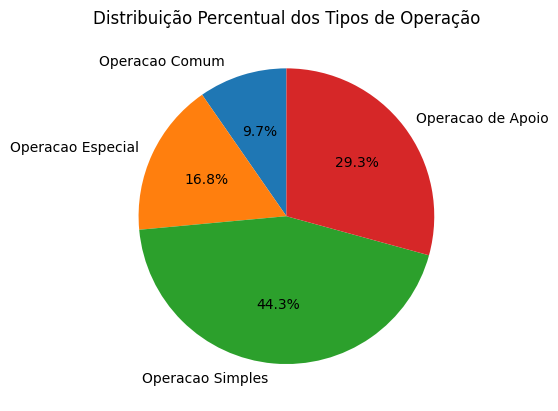

In [ ]:
# Group by 'Tipo de Operacao' and count occurrences
contagem_por_tipo = df.groupby('Tipo de Operacao')['Tipo de Operacao'].count()

# Print the count for each operation type
print(contagem_por_tipo)

# Calculate the total number of operations
total_operacoes = contagem_por_tipo.sum()

# Print the total count
print(f"\nTotal de operações: {total_operacoes}")

# Find the area with the most operations and its count
area_mais_operacoes = df.groupby('Area')['Tipo de Operacao'].count().idxmax()
contagem_operacoes = df.groupby('Area')['Tipo de Operacao'].count().max()

# Print the area with the most operations
print(f"\nA área com mais operações é: {area_mais_operacoes}, com um total de {contagem_operacoes} operações.")

# Calcular a porcentagem de cada tipo de operação
porcentagens = (contagem_por_tipo / total_operacoes) * 100

# Criar o gráfico de pizza
plt.pie(porcentagens, labels=porcentagens.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição Percentual dos Tipos de Operação')
plt.show()